In [1]:
import os 

import numpy  as np
import pandas as pd

import matplotlib
from matplotlib        import pyplot as plt
from matplotlib        import cm
from matplotlib.ticker import LinearLocator

WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from PCAfold import PCA as PCAA

In [2]:
DataDir = WORKSPACE_PATH + '/ROMNet/Data/PSR_100Cases/'

NCases  = 100

In [3]:
iSim =0
for iCase in range(NCases):
    if (iSim == 0):
        PD  = pd.read_csv(DataDir+'/orig_data/y.csv.'+str(iCase+1))
        Len = len(PD)
    else:
        PDTemp  = pd.read_csv(DataDir+'/orig_data/y.csv.'+str(iCase+1))
        LenTemp = len(PDTemp)
        PDTemp.set_index(np.arange(Len,Len+LenTemp))
        PD  = PD.append(PDTemp, ignore_index=True)
        Len = len(PD)
    iSim += 1
    
PD         = PD.rename(columns={"HH": "Enthalpy"})
yPDOrig    = PD.drop(columns=['t'])
yOrigNames = list(yPDOrig.columns)

In [4]:
KeepOrig   = list(yPDOrig.std(axis=0) > 1.e-10)
yCleanNames= [yOrigNames[i] for i in range(len(yOrigNames)) if KeepOrig[i]]
yPDClean   = yPDOrig[yCleanNames]
yClean     = yPDClean.to_numpy()

In [23]:
NPC        = 5

pca        = PCAA(yClean, scaling='pareto', n_components=NPC)
yPCA       = pca.transform(yClean, nocenter=False)
C          = pca.X_center
D          = pca.X_scale
A          = pca.A[:,0:NPC].T
L          = pca.L
AT         = A.T
# yMat_pca   = ((yMat.T - C)/D).dot(A)
yRec       = pca.reconstruct(yPCA, nocenter=False)

Text(0, 0.5, 'MSE')

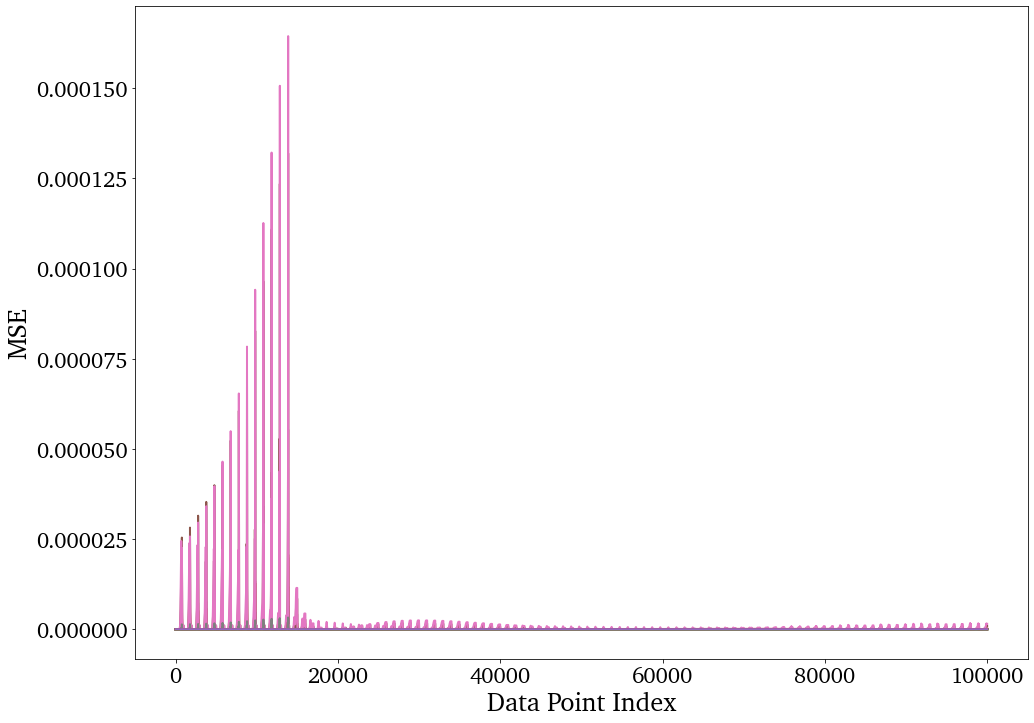

In [24]:
### Checking Errors

yPercError = (yRec-yClean+1.e-10) / (yClean+1.e-10)
yMSE       = (yRec-yClean)**2

plt.figure(figsize=(16,12))
plt.plot(yMSE)
plt.xlabel('Data Point Index')
plt.ylabel('MSE')

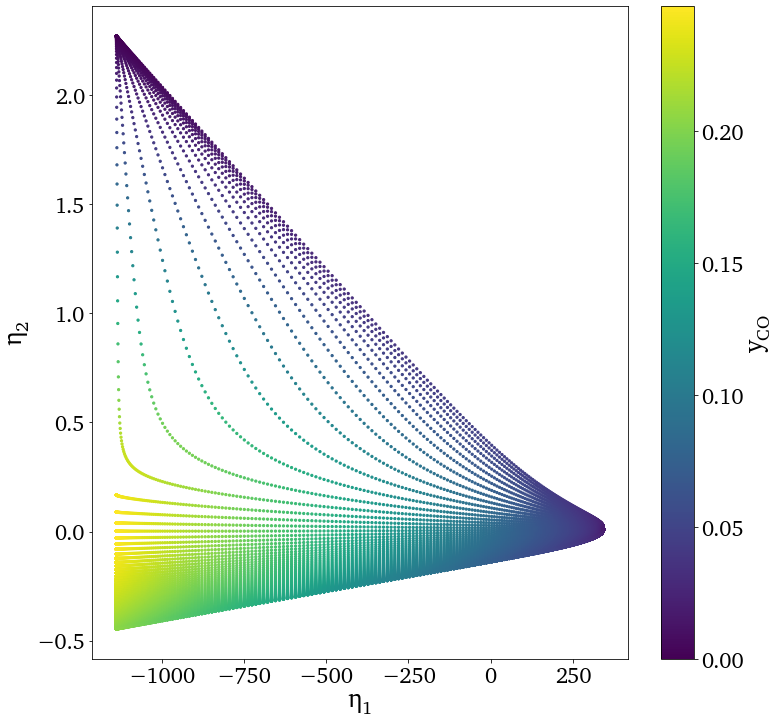

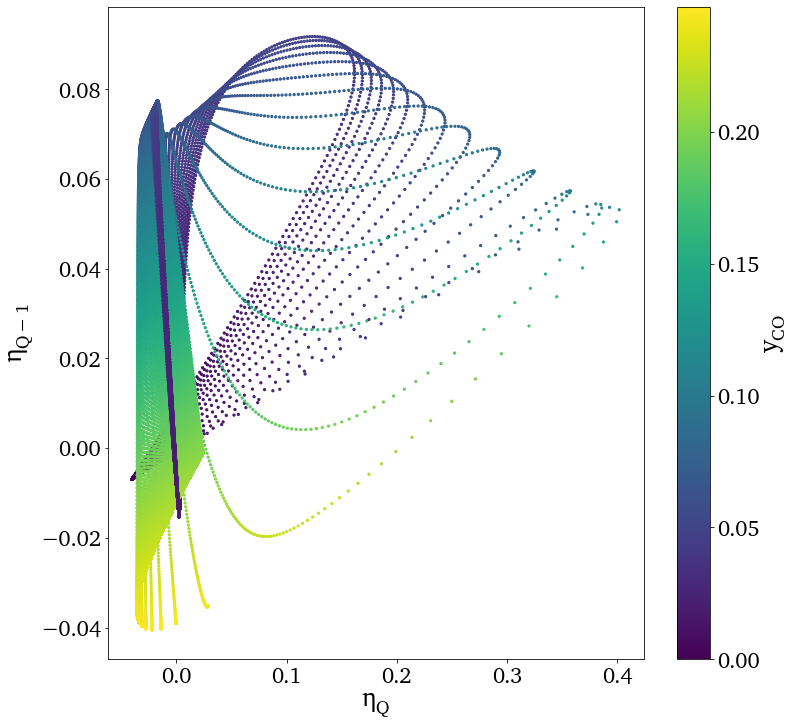

In [25]:
### Checking Scatter Plots

zVar = 'CO'
col  = np.abs(yPDClean[[zVar]].to_numpy()[:,0])
if (zVar != 'Enthalphy'):
    zVar = '$y_{'+zVar+'}$'

plt.figure(figsize=(12,12))
plt.scatter(yPCA[:,0], yPCA[:,1], s=5, c=col)
plt.xlabel(r'$\eta_1$')
plt.ylabel(r'$\eta_2$')
cbar = plt.colorbar()
cbar.set_label(zVar)

plt.figure(figsize=(12,12))
plt.scatter(yPCA[:,-1], yPCA[:,-2], s=5, c=col)
plt.xlabel(r'$\eta_{Q}$')
plt.ylabel(r'$\eta_{Q-1}$')
cbar = plt.colorbar()
cbar.set_label(zVar)

[Text(1, 1, 'Enthalpy'),
 Text(2, 1, ''),
 Text(3, 1, ''),
 Text(4, 1, ''),
 Text(5, 1, ''),
 Text(6, 1, ''),
 Text(7, 1, ''),
 Text(8, 1, ''),
 Text(9, 1, ''),
 Text(10, 1, ''),
 Text(11, 1, ''),
 Text(12, 1, ''),
 Text(13, 1, ''),
 Text(14, 1, ''),
 Text(15, 1, ''),
 Text(16, 1, ''),
 Text(17, 1, ''),
 Text(18, 1, ''),
 Text(19, 1, ''),
 Text(20, 1, ''),
 Text(21, 1, ''),
 Text(22, 1, ''),
 Text(23, 1, ''),
 Text(24, 1, ''),
 Text(25, 1, ''),
 Text(26, 1, ''),
 Text(27, 1, ''),
 Text(28, 1, ''),
 Text(29, 1, ''),
 Text(30, 1, ''),
 Text(31, 1, ''),
 Text(32, 1, ''),
 Text(33, 1, ''),
 Text(34, 1, ''),
 Text(35, 1, '')]

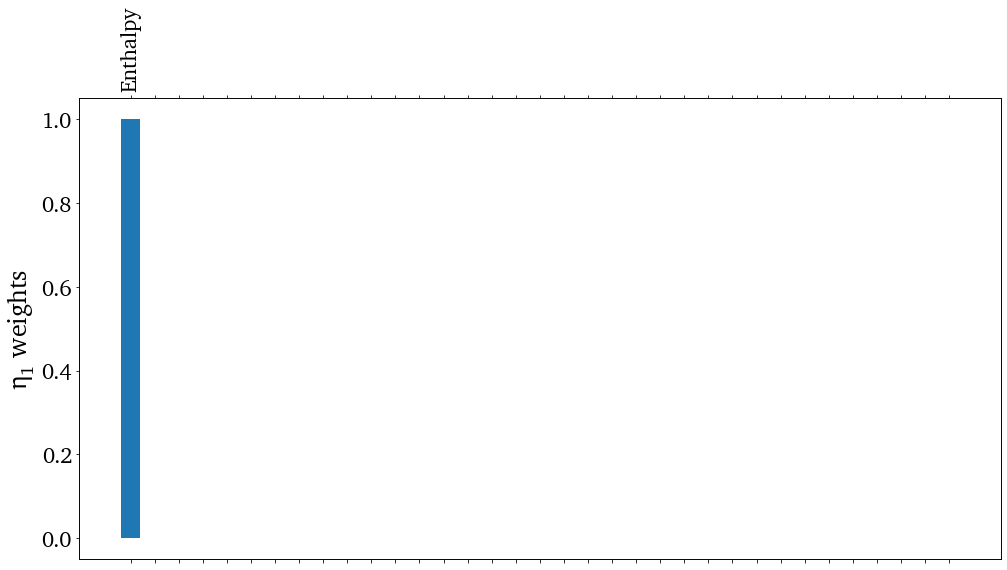

In [26]:
iPC = 1

MasksTop = A[iPC-1,:] > 1.e-1
MasksBot = A[iPC-1,:] < -1.e-1

NamesTop = ['']*A.shape[1]
for i in range(A.shape[1]):
    if (MasksTop[i]):
        NamesTop[i] = yCleanNames[i]
        
NamesBot = ['']*A.shape[1]
for i in range(A.shape[1]):
    if (MasksBot[i]):
        NamesBot[i] = yCleanNames[i]

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = ax1.twiny()

ax1.bar(np.arange(A.shape[1])+1, A[iPC-1,:])
ax2.bar(np.arange(A.shape[1])+1, A[iPC-1,:])

ax1.set_ylabel(r'$\eta_{'+str(iPC)+'}$ weights')
ax1.set_xticks(np.arange(A.shape[1])+1)
ax1.set_xticklabels(NamesBot, rotation=90)

ax2.set_xticks(np.arange(A.shape[1])+1)
ax2.set_xticklabels(NamesTop, rotation=90)

In [47]:
VoI  = 'CH4'
iVoI = yCleanNames.index(VoI)

ScalVec = ['auto','range','level','max','vast','pareto']
NPCVec  = np.arange(28)+3

yMSE = np.zeros((len(ScalVec), len(NPCVec)))

iS = 0
for Scal in ScalVec:
    
    iPC = 0
    for NPC in NPCVec:
        
        pca        = PCAA(yClean, scaling=Scal, n_components=int(NPC))
        yPCA       = pca.transform(yClean, nocenter=False)
        C          = pca.X_center
        D          = pca.X_scale
        A          = pca.A[:,0:NPC].T
        L          = pca.L
        AT         = A.T
        yRec       = pca.reconstruct(yPCA, nocenter=False)
        
        yMSE[iS,iPC] = np.sqrt( np.sum( (yRec[:,iVoI]-yClean[:,iVoI])**2, axis=0) )
        
        iPC += 1
        
    iS += 1
    
    
plt.figure(figsize=(16,12))
for iS in range(len(ScalVec)):
    plt.plot(NPCVec, yMSE[iS,:], label=ScalVec[iS])
plt.yscale('log')
plt.xlabel('No of Components')
plt.ylabel(VoI+', RMSE')
plt.legend()

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
